In [1]:
from typing import List, Tuple

import os


def getPredictedBoundsForSeq(seq, wprior,idModel=0):
    name = f"vox4_cuDi3_wCTC0.9_smooth10_SSGTrue_wprior{wprior}_useSGTrue_split200"
    path = pathExp + name + "\\"
    oneFold = [f for f in os.listdir(path) if "Results" not in f][idModel]
    path = path + oneFold + "\\Bounds\\" + seq
    bounds = parseLabelFile(path)
    return bounds


def getGTBoundsForSeq(seq):
    path = "C:\workspace2\Datasets\Chalearn\Label\\" + seq
    bounds = parseLabelFile(path)
    return bounds


def getMaxEnd(bounds):
    maxEnd = 0
    for b in bounds:
        if b[2] > maxEnd:
            maxEnd = b[2]
    return maxEnd


def parseLabelFile(filePath):
    labels: List[Tuple[int, int, int]] = []
    with open(filePath, "r") as f:
        lines = f.readlines()
        for line in lines:
            line = line.strip()
            if line == "":
                continue
            line = line.split(",")
            start = int(line[1])
            end = int(line[2])
            label = int(line[0])
            labels.append((label, start, end))
    return labels







In [9]:

seq = "Sample00004_data.txt"
db, nbClass = "Chalearn", 20
pathExp = f"C:\workspace2\Datasets\\{db}\expOut\\"

boundsGT = getGTBoundsForSeq(seq)
boundsPred = getPredictedBoundsForSeq(seq, 0.1)
end = getMaxEnd(boundsGT)
end2 = getMaxEnd(boundsPred)
end = max(end, end2)



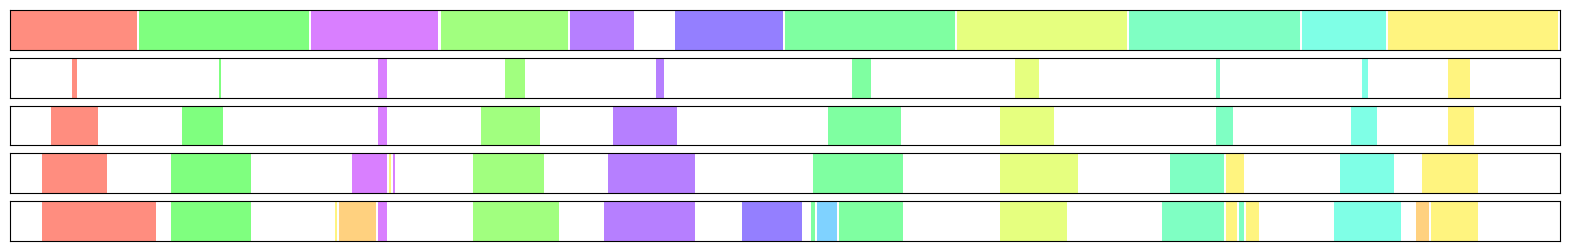

In [10]:
import matplotlib.pyplot as plt

cmap = plt.get_cmap("gist_rainbow", nbClass + 1)  # hsv

drawSubSequenceFrom = [80,800]
wpriors = [0.0, 0.1, 0.5, 0.9]
#plot the GT bounds on the first row, and the predicted bounds for each wprior in a following row
fig, ax = plt.subplots(1 + len(wpriors), 1, figsize=(20, 3))


for i, b in enumerate(boundsGT):
    ax[0].axvspan(b[1], b[2], facecolor=cmap(b[0]), alpha=0.5)
    # ax[0].text(b[1], 0, str(b[0]), fontsize=12)
    ax[0].set_xlim([drawSubSequenceFrom[0], drawSubSequenceFrom[1]])
    # remove y ticks
    ax[0].set_yticks([])
    ax[0].set_xticks([])
# ax[0].set_ylabel(f"GT")

for i, wprior in enumerate(wpriors):
    boundsPred = getPredictedBoundsForSeq(seq, wprior)
    for b in boundsPred:
        ax[i + 1].axvspan(b[1], b[2], facecolor=cmap(b[0]), alpha=0.5)
        # ax[i + 1].text(b[1], 0, str(b[0]), fontsize=12)
        # remove y ticks
    ax[i + 1].set_xlim([drawSubSequenceFrom[0], drawSubSequenceFrom[1]])
    ax[i + 1].set_ylim([0, 1])
    # draw a arrow for time axis
    # ax[i + 1].set_ylabel(f"Ψ={wprior}")

    ax[i + 1].set_yticks([])
    if i < len(wpriors) - 1:
        ax[i + 1].set_xticks([])

# ax[-1].set_xlabel("time")
ax[-1].set_xticks([])


plt.show()
# export in svg
fig.savefig("../Illustrations/ScoreGraphics/boundsPredictionsPsi.svg", format="svg")

[(13, 448, 482), (9, 884, 929)]
[[13, 440, 479], [9, 880, 959]]


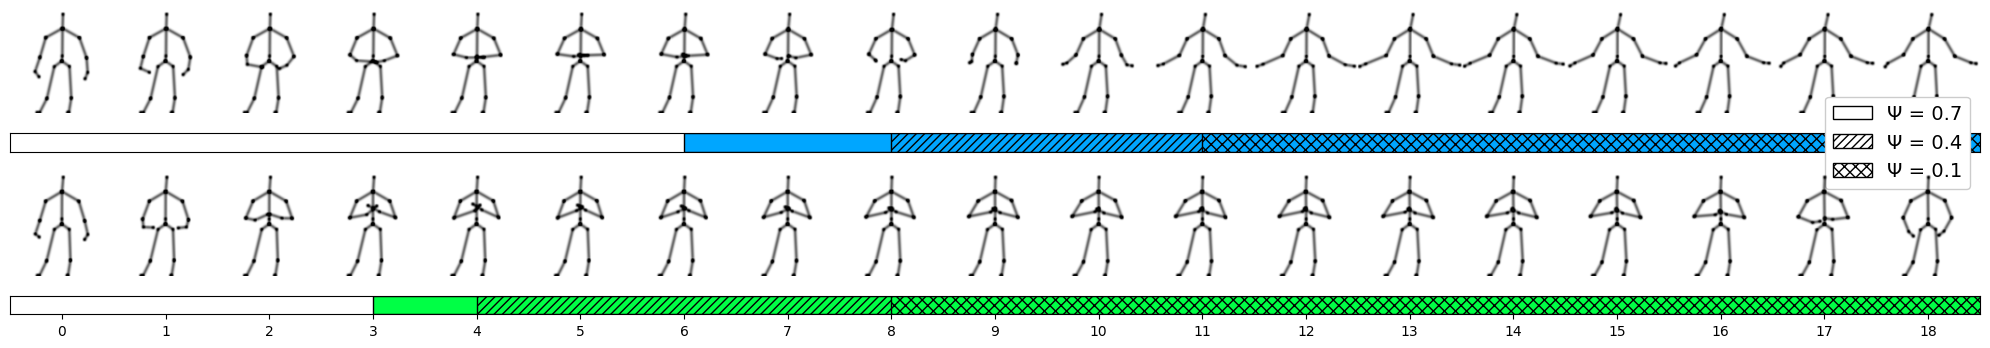

In [73]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
seq = "Sample00001_data.txt"

wprior = [0.1,0.4,0.7]
boundsGT = getGTBoundsForSeq(seq)
boundsPred = getPredictedBoundsForSeq(seq, wprior[2],1)

fig, axes = plt.subplots(4, 1, figsize=(20, 4), gridspec_kw={'height_ratios': [1, 0.1, 1, 0.1]})
fig.subplots_adjust(hspace=-0.5)
gestureToCompare= [13, 9]
boundsPred11And9 = [b for b in boundsPred if b[0] in gestureToCompare]
# keep first and last
boundsPred11And9 = [boundsPred11And9[0], boundsPred11And9[-1]]
print(boundsPred11And9)
boundsGT = [[b[0],b[1],b[2]] for b in boundsGT if b[0] in gestureToCompare]
print(boundsGT)
# boundsGT = [[13, 5, 19], [9, 449, 465]]
# boundsGT = [[13, 442, 458], [9, 882, 898]]
boundsGT = [[13, 442, 461], [9, 879, 916]]
# print(boundsGT)

pathImages = r"C:\workspace2\Datasets\Chalearn\Voxelized\\" + seq + "_Vox40_PerFrameCudi0\\"
boundsPredL2 = getPredictedBoundsForSeq(seq, wprior[1],1)
boundsPredL2 = [b for b in boundsPredL2 if b[0] in gestureToCompare]
boundsPredL3 = getPredictedBoundsForSeq(seq, wprior[0],1)
boundsPredL3 = [b for b in boundsPredL3 if b[0] in gestureToCompare]
patternsHatch = ["", "////", "xxx"]

 # downsample for the second item


for i, b in enumerate(boundsPred11And9):
    b1 = b[1]
    b2 = b[2]
    b0 = b[0]

    bl2_start = boundsPredL2[i][1]
    bl2_end = boundsPredL2[i][2]
    bl2_class = boundsPredL2[i][0]

    bl3_1 = boundsPredL3[i][1]
    bl3_2 = boundsPredL3[i][2]
    bl3_0 = boundsPredL3[i][0]

    gt1 = boundsGT[i][1]
    gt2 = boundsGT[i][2]
    gt0 = boundsGT[i][0]

    sample=1 if i==0 else 2
    if True:
        b1 = b1//sample
        b2 = b2//sample
        bl2_start = bl2_start//sample
        bl2_end = bl2_end//sample
        bl3_1 = bl3_1//sample
        bl3_2 = bl3_2//sample
        gt1 = gt1//sample
        gt2 = gt2//sample



    axes[i * 2 + 1].axvspan(b1,b2, facecolor=cmap(b0), alpha=1,hatch=patternsHatch[0],lw=1,edgecolor='black')
    axes[i * 2 + 1].axvspan(bl2_start, bl2_end, facecolor=cmap(bl2_class), alpha=1, hatch=patternsHatch[1], lw=1, edgecolor='black')
    axes[i * 2 + 1].axvspan(bl3_1, bl3_2, facecolor=cmap(bl3_0), alpha=1,hatch=patternsHatch[2],lw=1,edgecolor='black')
    axes[i * 2 + 1].set_xlim([gt1-0.5, gt2-0.5])
    axes[i * 2 + 1].set_xticks(np.arange(gt1, gt2, 1))
    axes[i * 2 + 1].set_xticklabels(np.arange(0, gt2 - gt1, 1))


    # Load images from pathImages and plot them into axes[i*2] in different columns to align with the temporal axis
   # Load images from pathImages and plot them into axes[i*2] in different columns to align with the temporal axis
    images_row = []
    mutl = sample
    for j in range(gt1*mutl, gt2*mutl, 1*mutl):
        image_path = pathImages + f"{j-3}.png" #-3 because on this sequence (sample00004), the 3 first frames are zero, and not drawn in the files
        image = Image.open(image_path)
        images_row.append(np.array(image))

    # Concatenate the images horizontally
    concatenated_image = np.concatenate(images_row, axis=1)

    # Plot the concatenated image using imshow
    axes[i * 2].imshow(concatenated_image)
    axes[i * 2].axis('off')
    # remove y ticks
    axes[i * 2].set_yticks([])
    axes[i * 2+1].set_yticks([])
    # the th ex label to time
    # axes[i * 2].set_xlabel("time")

axes[1].set_xticks([])

# legend for each hatches
axes[1].legend(handles=[mpatches.Patch(facecolor="white",lw=1,edgecolor="black", hatch=patternsHatch[0], label=f'Ψ = {wprior[2]}'),
                        mpatches.Patch(facecolor="white",lw=1,edgecolor="black", hatch=patternsHatch[1], label=f'Ψ = {wprior[1]}'),
                        mpatches.Patch(facecolor="white",lw=1,edgecolor="black", hatch=patternsHatch[2], label= f'Ψ = {wprior[0]}')],framealpha =1,fontsize=14,loc="right")
# wwhere mpatches is

# Remove the empty subplot in the last row
# fig.delaxes(axes[-1])

# Set the title and labels
# fig.suptitle("Gesture Recognition")
# axes[0].set_title("Images")
# axes[1].set_title("Predictions")
# axes[2].set_title("Images")
# axes[3].set_title("Predictions")



plt.tight_layout()
plt.show()
# export in svg
fig.savefig("../Illustrations/ScoreGraphics/qualitativeResult/boundsPredictionsPsi.svg", format="svg")

[(1, 95, 135), (3, 876, 911)]
GT, [[1, 80, 139], [3, 860, 919]]
boundsPredL2 [(1, 97, 121), (3, 880, 924)]
boundsPredL3 [(1, 99, 116), (3, 886, 902)]


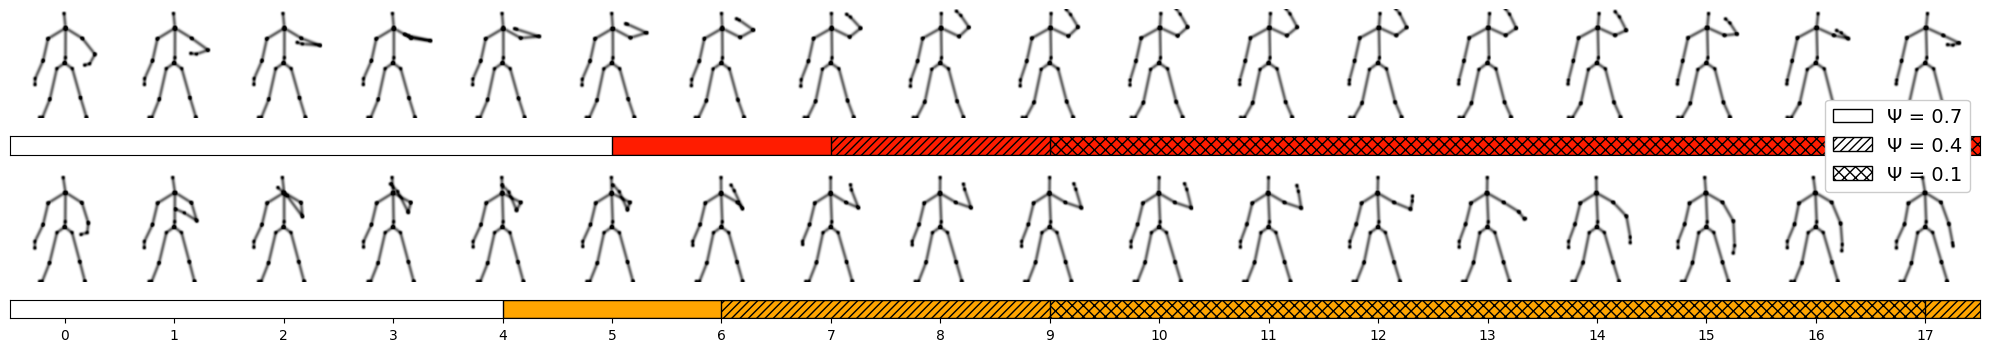

In [68]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
seq = "Sample00004_data.txt"

wprior = [0.1,0.4,0.7]
boundsGT = getGTBoundsForSeq(seq)
boundsPred = getPredictedBoundsForSeq(seq, wprior[2],1)

fig, axes = plt.subplots(4, 1, figsize=(20, 4), gridspec_kw={'height_ratios': [1, 0.1, 1, 0.1]})
fig.subplots_adjust(hspace=-0.5)
gestureToCompare= [3,1]
boundsPred11And9 = [b for b in boundsPred if b[0] in gestureToCompare]
# keep first and last
boundsPred11And9 = [boundsPred11And9[0], boundsPred11And9[-1]]
print(boundsPred11And9)
boundsGT = [[b[0],b[1],b[2]] for b in boundsGT if b[0] in gestureToCompare]
print("GT,",boundsGT)
# boundsGT = [[13, 5, 19], [9, 449, 465]]
# boundsGT = [[13, 442, 458], [9, 882, 898]]
# print(boundsGT)
# boundsGT = [[10, 618, 643], [3, 866, 891]]
# boundsGT = [[10, 610, 647], [3, 866, 903]]
# boundsGT[0] = [10,610, 647]
boundsGT = [[1, 90, 108], [3, 868, 904]]

pathImages = r"C:\workspace2\Datasets\Chalearn\Voxelized\\" + seq + "_Vox40_PerFrameCudi0\\"
boundsPredL2 = getPredictedBoundsForSeq(seq, wprior[1],1)
boundsPredL2 = [b for b in boundsPredL2 if b[0] in gestureToCompare]
boundsPredL3 = getPredictedBoundsForSeq(seq, wprior[0],1)
boundsPredL3 = [b for b in boundsPredL3 if b[0] in gestureToCompare]
patternsHatch = ["", "////", "xxx"]
print("boundsPredL2", boundsPredL2)
print("boundsPredL3", boundsPredL3)

for i, b in enumerate(boundsPred11And9):
    b1 = b[1]
    b2 = b[2]
    b0 = b[0]

    bl2_start = boundsPredL2[i][1]
    bl2_end = boundsPredL2[i][2]
    bl2_class = boundsPredL2[i][0]

    bl3_1 = boundsPredL3[i][1]
    bl3_2 = boundsPredL3[i][2]
    bl3_0 = boundsPredL3[i][0]

    gt1 = boundsGT[i][1]
    gt2 = boundsGT[i][2]
    gt0 = boundsGT[i][0]

    # one on two (downsample) if i==1
    # if i == 1:
    sample=1 if i==0 else 2
    if True:
        b1 = b1//sample
        b2 = b2//sample
        bl2_start = bl2_start//sample
        bl2_end = bl2_end//sample
        bl3_1 = bl3_1//sample
        bl3_2 = bl3_2//sample
        gt1 = gt1//sample
        gt2 = gt2//sample



    axes[i * 2 + 1].axvspan(b1,b2, facecolor=cmap(b0), alpha=1,hatch=patternsHatch[0],lw=1,edgecolor='black')
    axes[i * 2 + 1].axvspan(bl2_start, bl2_end, facecolor=cmap(bl2_class), alpha=1, hatch=patternsHatch[1], lw=1, edgecolor='black')
    axes[i * 2 + 1].axvspan(bl3_1, bl3_2, facecolor=cmap(bl3_0), alpha=1,hatch=patternsHatch[2],lw=1,edgecolor='black')
    axes[i * 2 + 1].set_xlim([gt1-0.5, gt2-0.5])
    axes[i * 2 + 1].set_xticks(np.arange(gt1, gt2, 1))
    axes[i * 2 + 1].set_xticklabels(np.arange(0, gt2 - gt1, 1))

    # Load images from pathImages and plot them into axes[i*2] in different columns to align with the temporal axis
   # Load images from pathImages and plot them into axes[i*2] in different columns to align with the temporal axis
    images_row = []
    mutl =  sample
    for j in range(gt1*mutl, gt2*mutl, 1*mutl):
        rj = max(0, j-3)#-3 because on this sequence (sample00004), the 3 first frames are zero, and not drawn in the files
        image_path = pathImages + f"{rj}.png"
        image = Image.open(image_path)
        images_row.append(np.array(image))


    # Concatenate the images horizontally
    concatenated_image = np.concatenate(images_row, axis=1)

    # Plot the concatenated image using imshow
    axes[i * 2].imshow(concatenated_image)
    axes[i * 2].axis('off')
    # remove y ticks
    axes[i * 2].set_yticks([])
    axes[i * 2+1].set_yticks([])
    # the th ex label to time
    # axes[i * 2].set_xlabel("time")

axes[1].set_xticks([])

# legend for each hatches
axes[1].legend(handles=[mpatches.Patch(facecolor="white",lw=1,edgecolor="black", hatch=patternsHatch[0], label=f'Ψ = {wprior[2]}'),
                        mpatches.Patch(facecolor="white",lw=1,edgecolor="black", hatch=patternsHatch[1], label=f'Ψ = {wprior[1]}'),
                        mpatches.Patch(facecolor="white",lw=1,edgecolor="black", hatch=patternsHatch[2], label= f'Ψ = {wprior[0]}')],framealpha =1,fontsize=14,loc="right")
# wwhere mpatches is

# Remove the empty subplot in the last row
# fig.delaxes(axes[-1])

# Set the title and labels
# fig.suptitle("Gesture Recognition")
# axes[0].set_title("Images")
# axes[1].set_title("Predictions")
# axes[2].set_title("Images")
# axes[3].set_title("Predictions")



plt.tight_layout()
plt.show()
# export in svg
fig.savefig("../Illustrations/ScoreGraphics/qualitativeResult/boundsPredictionsPsi2.svg", format="svg")